### Daniel Dorado - Sofía Álvarez

In [1]:
# ESAI
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit

<h1 align='center'>Laboratorio 5: Efecto Hall</h1>

## Actividad 1: Campo magnético en función de la corriente

In [2]:
actividad_1 = pd.read_excel('Efecto_Hall.xlsx', sheet_name='B-I')

Ajustamos una regresión lineal a nuestros datos utilizando <code>scipy</code>:

In [3]:
def ajuste_lineal(x,m,b): 
    return m*x + b

In [4]:
x = np.linspace(actividad_1['Corriente (A)'][0], actividad_1['Corriente (A)'][len(actividad_1)-1], 100)
popt_act1, pcov_act1 = curve_fit(ajuste_lineal, actividad_1['Corriente (A)'], actividad_1['Campo (mT)'])

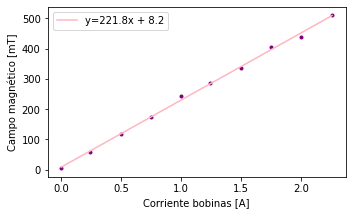

In [5]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(actividad_1['Corriente (A)'], actividad_1['Campo (mT)'], '.', c='purple')
plt.plot(x, x*popt_act1[0] + popt_act1[1],c='lightpink', label='y={:.1f}x + {:.1f}'.format(popt_act1[0], popt_act1[1]))
for i in range(len(actividad_1['Corriente (A)'])):
    plt.errorbar(actividad_1['Corriente (A)'][i], actividad_1['Campo (mT)'][i],yerr=np.sqrt(pcov_act1[0,0]), c='red')
plt.xlabel('Corriente bobinas [A]')
plt.ylabel('Campo magnético [mT]')
plt.tight_layout()
plt.legend()
plt.savefig('regresion_campo.pdf')

Incertidumbre de la pendiente y del punto de corte:

In [6]:
print('Incertidumbre pendiente: ', pcov_act1[0,0])
print('Incertidumbre punto de corte: ', pcov_act1[1,1])

Incertidumbre pendiente:  11.175799118168198
Incertidumbre punto de corte:  19.923988841594426


## Actividad 2
### Voltaje de Hall en función de la corriente $I_p$ - Tarjeta P

In [7]:
p_V_I = pd.read_excel('Efecto_Hall.xlsx', sheet_name='p V-I')

In [8]:
x = np.linspace(p_V_I['Corriente (mA)'][0], p_V_I['Corriente (mA)'][len(p_V_I)-1], 100)
popt_150, pcov_150 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 1,5 A (mV)'])
popt_175, pcov_175 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 1,75 A (mV)'])
popt_200, pcov_200 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 2 A (mV)'])
popt_225, pcov_225 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 2,25 A (mV)'])
popt_250, pcov_250 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 2,5 A (mV)'])

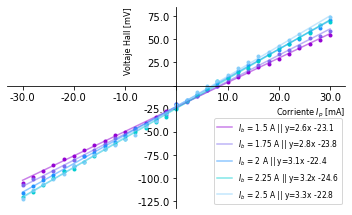

In [9]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
colors = ['darkviolet', 'mediumslateblue', 'dodgerblue', 'darkturquoise', 'lightskyblue', 'turquoise']
for i,col in enumerate(p_V_I.columns):
    if col != 'Corriente (mA)':
        plt.plot(p_V_I['Corriente (mA)'], p_V_I[col], '.',c=colors[i-1])
        i_b += 0.25
plt.plot(x, x*popt_150[0] + popt_150[1],c='darkviolet', alpha=0.5, label= '$I_b$ = 1.5 A ||' + ' y={:.1f}x {:.1f}'.format(popt_150[0], popt_150[1]))
plt.plot(x, x*popt_175[0] + popt_175[1],c='mediumslateblue', alpha=0.5, label='$I_b$ = 1.75 A ||' +' y={:.1f}x {:.1f}'.format(popt_175[0], popt_175[1]))
plt.plot(x, x*popt_200[0] + popt_200[1],c='dodgerblue', alpha=0.5, label='$I_b$ = 2 A ||' + ' y={:.1f}x {:.1f}'.format(popt_200[0], popt_200[1]))
plt.plot(x, x*popt_225[0] + popt_225[1],c='darkturquoise', alpha=0.5, label='$I_b$ = 2.25 A ||' + ' y={:.1f}x {:.1f}'.format(popt_225[0], popt_225[1]))
plt.plot(x, x*popt_250[0] + popt_250[1],c='lightskyblue', alpha=0.5, label='$I_b$ = 2.5 A ||' +' y={:.1f}x {:.1f}'.format(popt_250[0], popt_250[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Corriente $I_p$ [mA]', fontsize=8, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=8, loc='top')
plt.tight_layout()
ax.legend(loc='lower right',prop={'size': 7.5})
plt.savefig('p-V-I.pdf')

Ahora calculamos el coeficiente de Hall para cada corriente $I_b$ que utilizamos:

$$R_H = \frac{V_H w}{I_p B_z}$$

Note que la pendiente de todas las regresiones es $m = R_H\cdot\frac{B_z}{w}$, entonces $R_H = m \cdot\frac{w}{B_z}$.

No obstante, primero debemos calcular B_z de acuerdo con la regresión de la actividad 1, para un valor de $I_b$ determinado. Así:

In [10]:
I_b = [1.5, 1.75, 2, 2.25, 2.5] # En Amperios
B_z = [i*popt_act1[0] + popt_act1[1] for i in I_b] # En mT

In [11]:
# m en mV/mA
# w en metros
def R_H(m,B_z,w=1e-3):
    return m*w/B_z

In [12]:
# Esto queda en Ohm*m/T
R_H_150 = R_H(popt_150[0],B_z[0])
R_H_175 = R_H(popt_175[0],B_z[1])
R_H_200 = R_H(popt_200[0],B_z[2])
R_H_225 = R_H(popt_225[0],B_z[3])
R_H_250 = R_H(popt_250[0],B_z[4])
R_H_p = [R_H_150, R_H_175, R_H_200, R_H_225, R_H_250]
incertidumbres = [pcov_150[0,0], pcov_175[0,0], pcov_200[0,0], pcov_225[0,0], pcov_250[0,0]]

In [13]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_p)

Los valores de las resistencias de Hall en Ohm*m/mT:  [7.751324474113994e-06, 7.15653880327402e-06, 6.8463071449524696e-06, 6.291794431972329e-06, 5.818148626115774e-06]


Queremos ver cómo se comporta la resistencia de Hall en función del campo magnético:

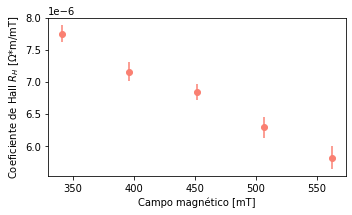

In [14]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(B_z, R_H_p, color='salmon')
plt.xlabel('Campo magnético [mT]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
for i in range(len(R_H_p)):
    plt.errorbar(B_z[i], R_H_p[i], yerr=np.sqrt(incertidumbres[i]*10**(-10)), c='salmon')
plt.tight_layout()
plt.savefig('Hall_coeff_tarjeta_p.pdf')

Note que tenemos una relación inversa entre la resistencia de Hall y el campo magnético, como es de esperarse. A medida que aumenta el campo magnético, disminuye la resistencia de Hall.

### Voltaje de Hall en función de la corriente $I_p$ - Tarjeta N

In [15]:
n_V_I = pd.read_excel('Efecto_Hall.xlsx', sheet_name='n V-I')

In [16]:
x = np.linspace(n_V_I['Corriente (mA)'][0], n_V_I['Corriente (mA)'][len(n_V_I)-1], 100)
popt_150, pcov_150 = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 1,5 A (mV)'])
popt_175, pcov_175 = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 1,75 A (mV)'])
popt_200, pcov_200 = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 2 A (mV)'])
popt_225, pcov_225 = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 2,25 A (mV)'])
popt_250, pcov_250 = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 2,5 A (mV)'])

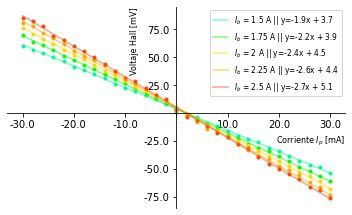

In [17]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
colors = ['mediumspringgreen', 'lime', 'gold', 'orange', 'orangered', 'red']
for i,col in enumerate(n_V_I.columns):
    if col != 'Corriente (mA)':
        plt.plot(n_V_I['Corriente (mA)'], n_V_I[col], '.',c=colors[i-1])
        i_b += 0.25
plt.plot(x, x*popt_150[0] + popt_150[1],c=colors[0], alpha=0.5, label= '$I_b$ = 1.5 A ||' + ' y={:.1f}x + {:.1f}'.format(popt_150[0], popt_150[1]))
plt.plot(x, x*popt_175[0] + popt_175[1],c=colors[1], alpha=0.5, label='$I_b$ = 1.75 A ||' +' y={:.1f}x + {:.1f}'.format(popt_175[0], popt_175[1]))
plt.plot(x, x*popt_200[0] + popt_200[1],c=colors[2], alpha=0.5, label='$I_b$ = 2 A ||' + ' y={:.1f}x + {:.1f}'.format(popt_200[0], popt_200[1]))
plt.plot(x, x*popt_225[0] + popt_225[1],c=colors[3], alpha=0.5, label='$I_b$ = 2.25 A ||' + ' y={:.1f}x + {:.1f}'.format(popt_225[0], popt_225[1]))
plt.plot(x, x*popt_250[0] + popt_250[1],c=colors[4], alpha=0.5, label='$I_b$ = 2.5 A ||' +' y={:.1f}x + {:.1f}'.format(popt_250[0], popt_250[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Corriente $I_p$ [mA]', fontsize=8, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=8, loc='top')
plt.tight_layout()
ax.legend(loc='upper right',prop={'size': 7.5})
plt.savefig('n-V-I.pdf')

In [18]:
# Esto queda en Ohm*m/mT
R_H_150 = R_H(popt_150[0],B_z[0])
R_H_175 = R_H(popt_175[0],B_z[1])
R_H_200 = R_H(popt_200[0],B_z[2])
R_H_225 = R_H(popt_225[0],B_z[3])
R_H_250 = R_H(popt_250[0],B_z[4])
R_H_p = [R_H_150, R_H_175, R_H_200, R_H_225, R_H_250]
incertidumbres = [pcov_150[0,0], pcov_175[0,0], pcov_200[0,0], pcov_225[0,0], pcov_250[0,0]]

In [19]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_p)

Los valores de las resistencias de Hall en Ohm*m/mT:  [-5.614669792029479e-06, -5.4854334528397695e-06, -5.294515011574038e-06, -5.110316661949324e-06, -4.854351478828723e-06]


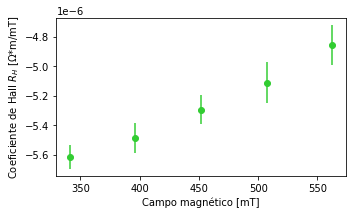

In [70]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(B_z, R_H_p, color='limegreen')
plt.xlabel('Campo magnético [mT]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
for i in range(len(R_H_p)):
    plt.errorbar(B_z[i], R_H_p[i], yerr=np.sqrt(incertidumbres[i]*10**(-10)), c='limegreen')
plt.tight_layout()
plt.savefig('Hall_coeff_tarjeta_n.pdf')

### Voltaje de Hall en función del campo magnético - tarjeta P

In [21]:
p_V_B = pd.read_excel('Efecto_Hall.xlsx', sheet_name='p V-B')

In [22]:
p_V_B['Campo (mT)'] = p_V_B['Corriente (A)']*popt_act1[0] + popt_act1[1]

In [23]:
x = np.linspace(p_V_B['Campo (mT)'][0], p_V_B['Campo (mT)'][len(p_V_B)-1], 100)
popt_21, pcov_21 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a 21 mA (mV)'])
popt_30, pcov_30 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a 30 mA (mV)'])
popt_neg_20, pcov_neg_20 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a -20 mA (mV)'])
popt_neg_30, pcov_neg_30 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a -30 mA (mV)'])

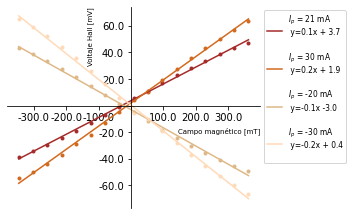

In [24]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
colors = ['brown', 'chocolate', 'burlywood', 'peachpuff']
for i,col in enumerate(p_V_B.columns):
    if col != 'Corriente (A)' and col != 'Campo (mT)':
        plt.plot(p_V_B['Campo (mT)'], p_V_B[col], '.',c=colors[i-1])
        i_b += 0.25
plt.plot(x, x*popt_21[0] + popt_21[1],c=colors[0], label= '$I_p$ = 21 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_21[0], popt_21[1]))
plt.plot(x, x*popt_30[0] + popt_30[1],c=colors[1], label='$I_p$ = 30 mA \n' +' y={:.1f}x + {:.1f}\n'.format(popt_30[0], popt_30[1]))
plt.plot(x, x*popt_neg_20[0] + popt_neg_20[1],c=colors[2], label='$I_p$ = -20 mA \n' + ' y={:.1f}x {:.1f}\n'.format(popt_neg_20[0], popt_neg_20[1]))
plt.plot(x, x*popt_neg_30[0] + popt_neg_30[1],c=colors[3], label='$I_p$ = -30 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_neg_30[0], popt_neg_30[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Campo magnético [mT]', fontsize=7, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=7, loc='top')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 7.5})
plt.tight_layout()
fig.savefig('p-V-B.pdf')

En este caso, tenemos que calculamos el coeficiente de Hall como: $m = R_H \cdot \frac{I_p}{w}$. Entonces $R_H = m \frac{w}{I_p}$,

In [25]:
def R_H_2(m,I_p,w=1e-3):
    return m*w/I_p

In [68]:
# Esto queda en Ohm*m/mT
w = 1*10**(-3)
I_p = [21, 30, -20, -30]
R_H_21 = popt_21[0]*w/I_p[0]
R_H_30 = popt_30[0]*w/I_p[1]
R_H_neg_20 = popt_neg_20[0]*w/I_p[2]
R_H_neg_30 = popt_neg_30[0]*w/I_p[3]
R_H_p_B = [R_H_21, R_H_30, R_H_neg_30, R_H_neg_20]
#incertidumbres = [pcov_150[0,0], pcov_175[0,0], pcov_200[0,0], pcov_225[0,0]]


In [69]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_p_B)

Los valores de las resistencias de Hall en Ohm*m/mT:  [6.016246510614599e-06, 5.812187765154268e-06, 6.46275494025042e-06, 6.837862541213102e-06]


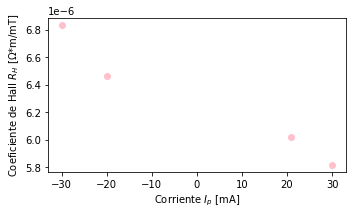

In [71]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(I_p, R_H_p_B, color='pink',label='Tarjeta P')
plt.xlabel('Corriente $I_p$ [mA]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
plt.tight_layout()
plt.savefig('Hall_coeff_tarjeta_p_2.pdf')

In [29]:
n_V_B = pd.read_excel('Efecto_Hall.xlsx', sheet_name='n V-B')

In [30]:
n_V_B['Campo (mT)'] = n_V_B['Corriente (A)']*popt_act1[0] + popt_act1[1]

In [31]:
x = np.linspace(n_V_B['Campo (mT)'][0], n_V_B['Campo (mT)'][len(n_V_B)-1], 100)
popt_20_n, pcov_20_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a 20 mA (mV)'])
popt_30_n, pcov_30_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a 30 mA (mV)'])
popt_neg_20_n, pcov_neg_20_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a -20 mA (mV)'])
popt_neg_30_n, pcov_neg_30_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a -30 mA (mV)'])

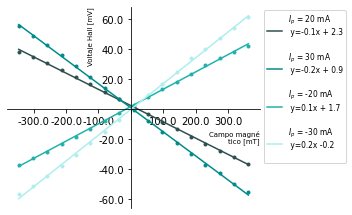

In [33]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
colors = ['darkslategray', 'darkcyan', 'lightseagreen', 'paleturquoise']
for i,col in enumerate(n_V_B.columns):
    if col != 'Corriente (A)' and col != 'Campo (mT)':
        plt.plot(n_V_B['Campo (mT)'], n_V_B[col], '.',c=colors[i-1])
        i_b += 0.25
plt.plot(x, x*popt_20_n[0] + popt_20_n[1],c=colors[0], label= '$I_p$ = 20 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_20_n[0], popt_20_n[1]))
plt.plot(x, x*popt_30_n[0] + popt_30_n[1],c=colors[1], label='$I_p$ = 30 mA \n' +' y={:.1f}x + {:.1f}\n'.format(popt_30_n[0], popt_30_n[1]))
plt.plot(x, x*popt_neg_20_n[0] + popt_neg_20_n[1],c=colors[2], label='$I_p$ = -20 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_neg_20_n[0], popt_neg_20_n[1]))
plt.plot(x, x*popt_neg_30_n[0] + popt_neg_30_n[1],c=colors[3], label='$I_p$ = -30 mA \n' + ' y={:.1f}x {:.1f}\n'.format(popt_neg_30_n[0], popt_neg_30_n[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Campo magné\ntico [mT]', fontsize=7, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=7, loc='top')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 7.5})
plt.tight_layout()
fig.savefig('n-V-B.pdf')

In [65]:
# Esto queda en Ohm*m/mT
I_p = [20, 30, -20, -30]
R_H_20_n = R_H_2(popt_20_n[0],I_p[0])
R_H_30_n = R_H_2(popt_30_n[0],I_p[1])
R_H_neg_20_n = R_H_2(popt_neg_20_n[0],I_p[2])
R_H_neg_30_n = R_H_2(popt_neg_30_n[0],I_p[3])
R_H_n_B = [R_H_20_n, R_H_30_n, R_H_neg_30_n, R_H_neg_20_n]
#incertidumbres = [pcov_150[0,0], pcov_175[0,0], pcov_200[0,0], pcov_225[0,0]]

In [66]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_n_B)

Los valores de las resistencias de Hall en Ohm*m/mT:  [-5.41995027998245e-06, -5.346365459250106e-06, -5.734642810409225e-06, -5.7686262878314106e-06]


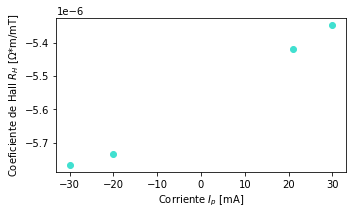

In [72]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(I_p, R_H_n_B, color='turquoise',label='Tarjeta N')
plt.xlabel('Corriente $I_p$ [mA]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
plt.tight_layout()
plt.savefig('Hall_coeff_tarjeta_n_2.pdf')

In [44]:
popt_neg_30_n[0]*w/(-30)

-5.734642810409225e-06

In [45]:
popt_neg_20_n[0]*w/(-20)

-5.7686262878314106e-06

In [49]:
popt_neg_20_n

array([0.11537253, 1.73926277])

In [55]:
np.round(popt_neg_30_n[0],1)

0.2